In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.imports import *
from fastcore.all import *
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy
import os
from os import listdir
working_directory = os.getcwd()
print(working_directory)

/Users/tribhuvan/Desktop/fastbook


In [3]:
#For example, so not exported
from fastai.vision.core import *
from fastai.vision.data import *

In [4]:
path = Path('PlantVillage/')

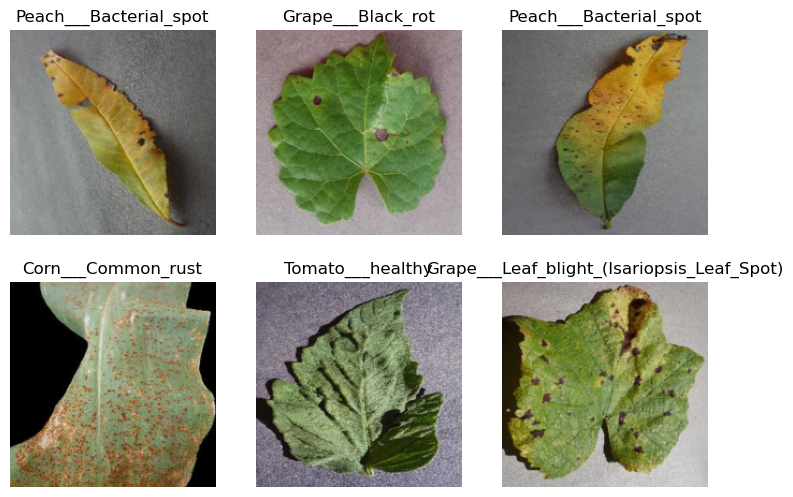

In [5]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32,num_workers=0)

dls.show_batch(max_n=6)

In [6]:
blocks=(ImageBlock, CategoryBlock),

In [7]:
get_items=get_image_files,

In [8]:
splitter=RandomSplitter(valid_pct=0.2, seed=42),

In [9]:
get_y=parent_label,


In [10]:
item_tfms=[Resize(192, method='squish')]

In [11]:
learn = vision_learner(dls, arch=resnet34, metrics=[accuracy, error_rate])
learn.fine_tune(4)

/Users/tribhuvan/Desktop/fastbook/fastai/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/tribhuvan/Desktop/fastbook/fastai/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.349890,0.171826,0.946974,0.053026,14:09


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.134691,0.068058,0.976463,0.023537,20:05
1,0.056079,0.040512,0.988818,0.011182,20:24
2,0.023028,0.017932,0.994950,0.005050,21:03
3,0.006183,0.012432,0.996844,0.003156,21:17


In [12]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.016131,0.023886,0.993146,0.006854,16:15


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.020144,0.020369,0.994679,0.005321,22:45


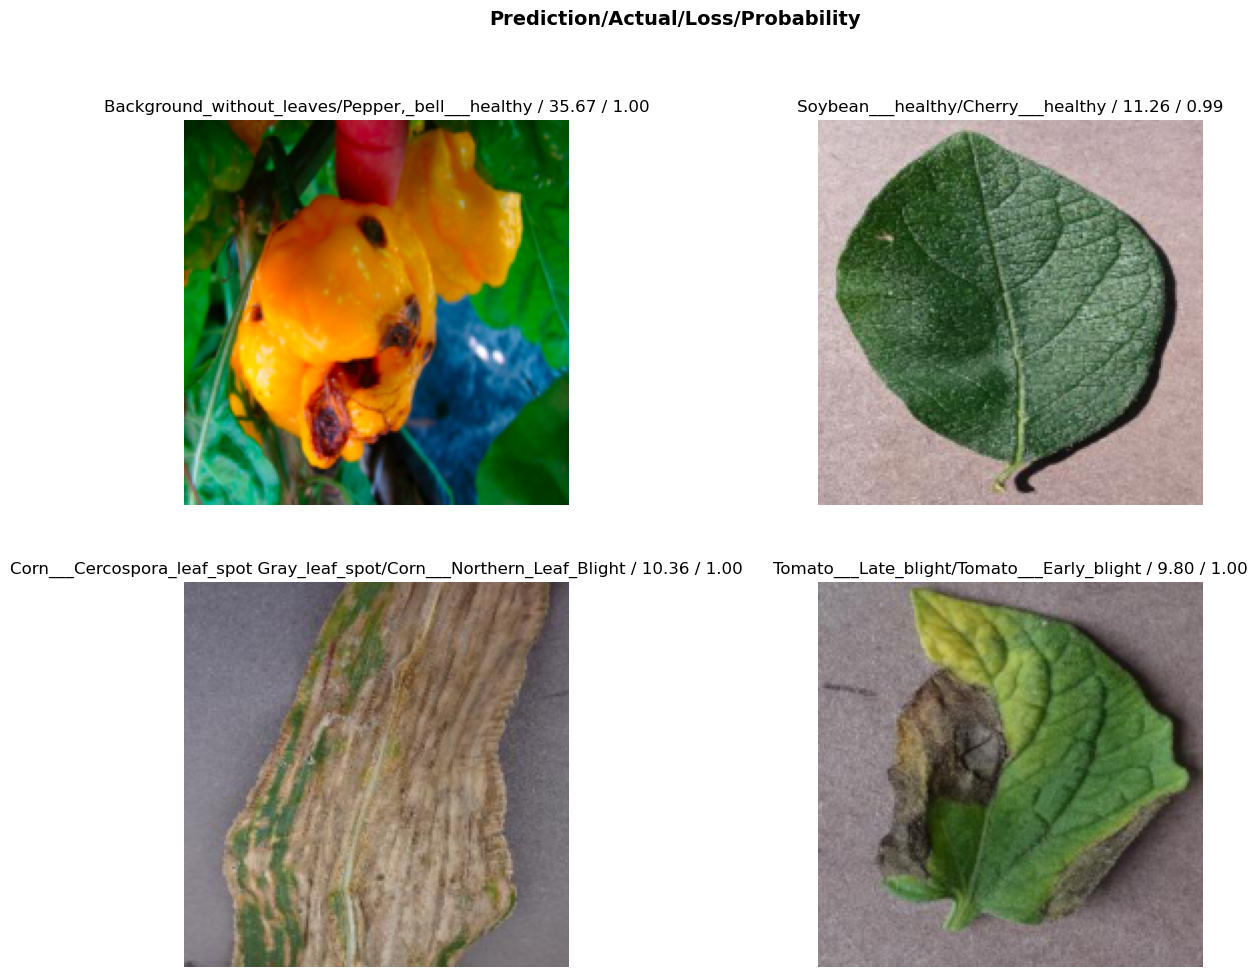

In [13]:
interp=ClassificationInterpretation.from_learner(learn)
losses,idxs=interp.top_losses()
interp.plot_top_losses(4,figsize=(15,11))

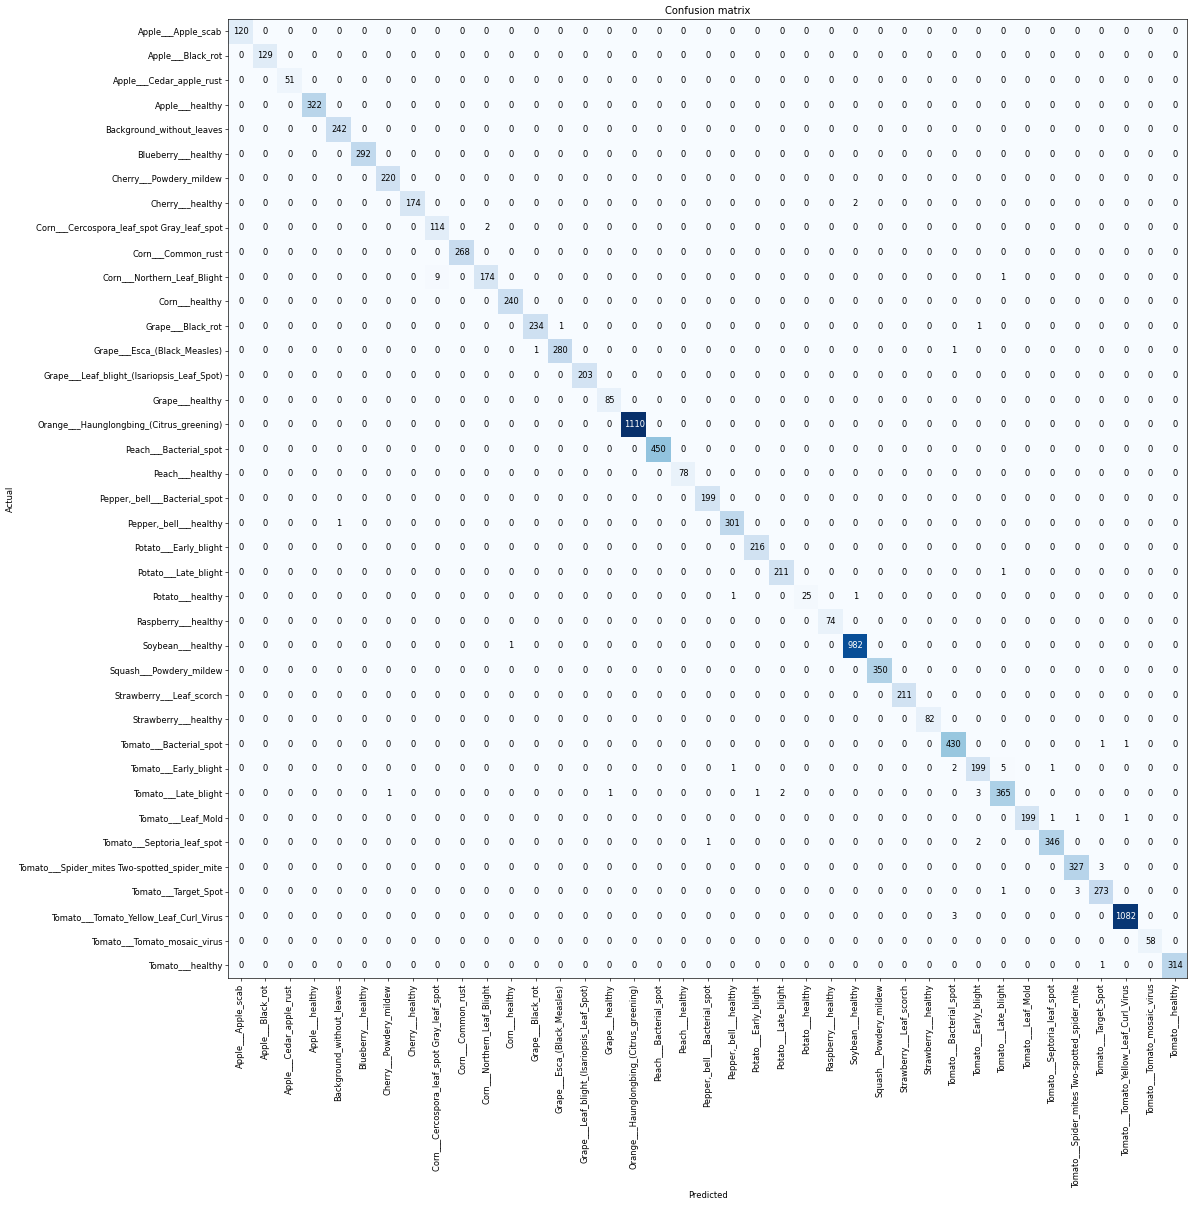

In [48]:
interpret = ClassificationInterpretation.from_learner(learn)

interpret.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [44]:
files = get_image_files(path/"Tomato___Spider_mites Two-spotted_spider_mite")
len(files)

1676

In [45]:
learn.predict(files[3])

('Tomato___Spider_mites Two-spotted_spider_mite',
 TensorBase(34),
 TensorBase([2.1454e-10, 1.3654e-11, 1.2742e-08, 2.0390e-07, 2.0534e-08,
             2.2924e-08, 5.1097e-10, 4.8027e-10, 2.5284e-09, 3.7580e-08,
             1.6030e-06, 4.2657e-08, 5.5343e-11, 8.6895e-10, 4.4636e-10,
             1.1329e-08, 1.2366e-06, 2.1280e-10, 2.1414e-08, 2.6281e-10,
             7.1101e-09, 7.3949e-10, 3.0900e-09, 4.5762e-06, 3.2294e-08,
             3.9968e-08, 6.1672e-08, 2.8745e-11, 2.5950e-08, 1.2839e-08,
             3.0583e-09, 3.8955e-09, 2.2715e-06, 2.4170e-07, 9.9999e-01,
             1.6540e-06, 4.3117e-09, 1.0315e-07, 8.9657e-07]))

In [46]:
from PIL import Image
  
# open method used to open different extension image file
im = Image.open(files[0]) 
  
# This method will show image in any image viewer 
im.show()

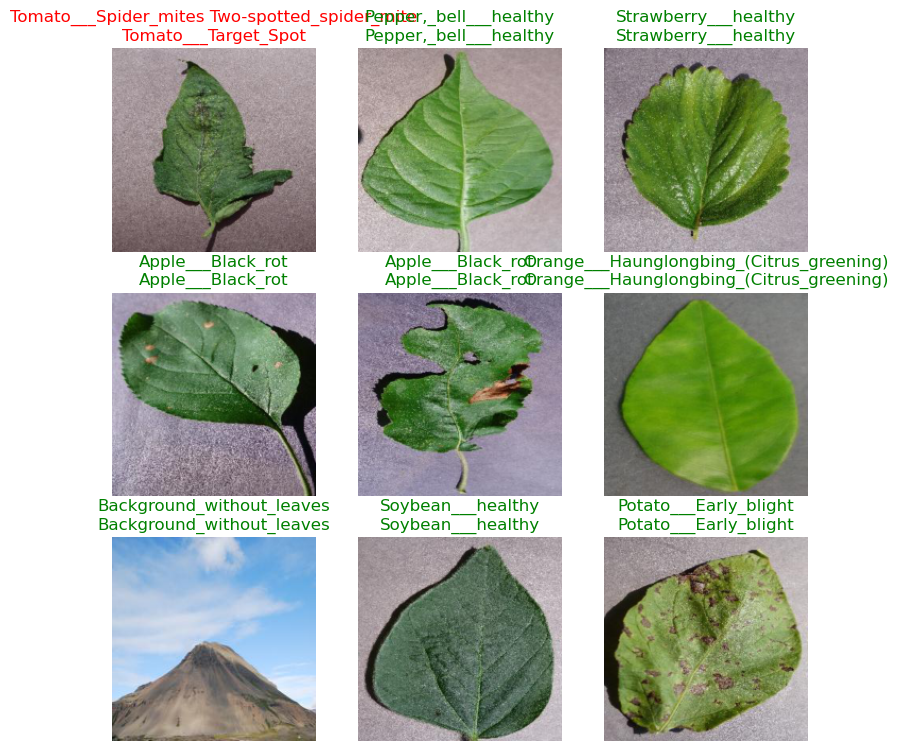

In [47]:
learn.show_results()

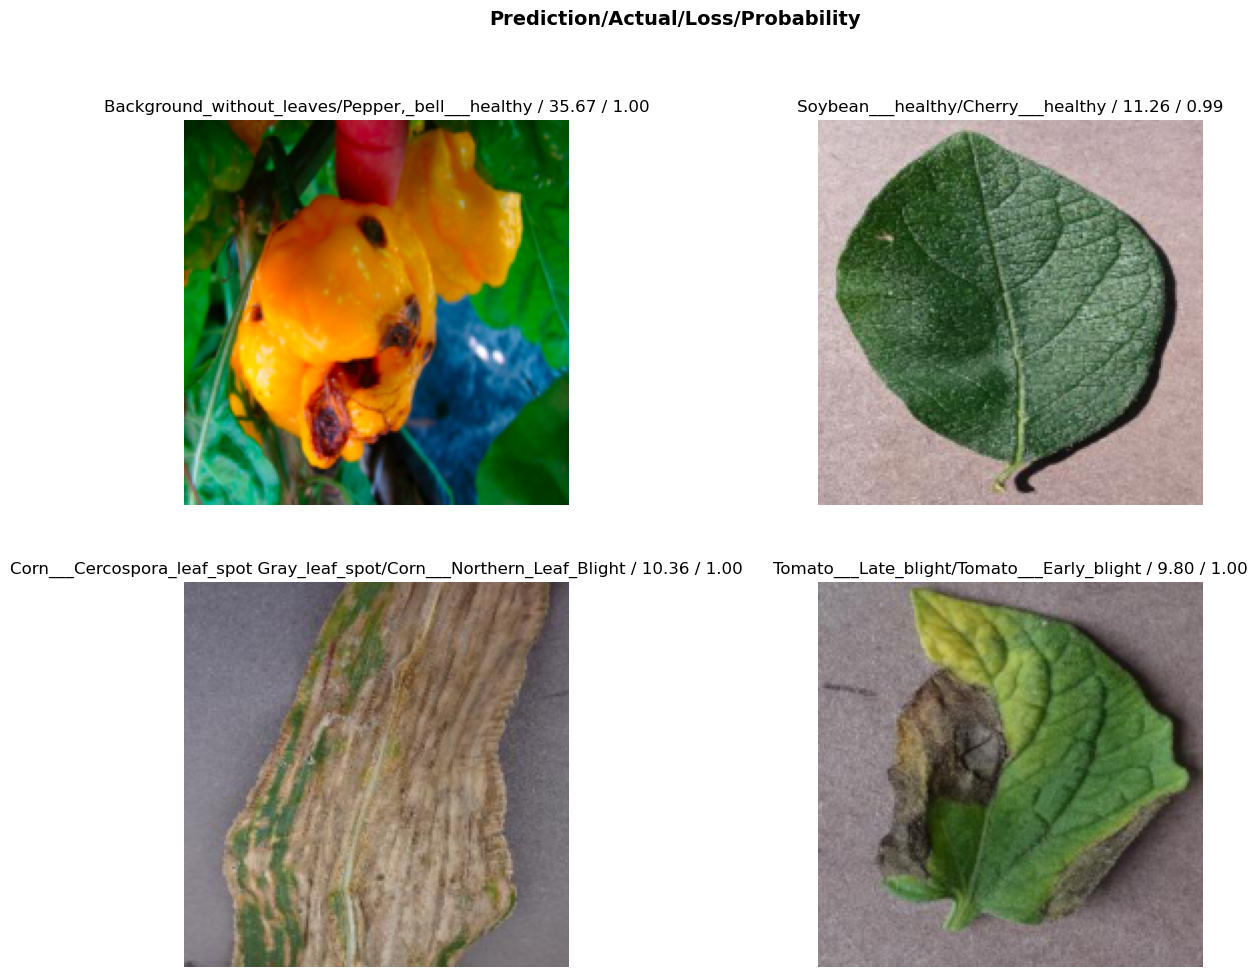

In [43]:
interp=ClassificationInterpretation.from_learner(learn)
losses,idxs=interp.top_losses()
interp.plot_top_losses(4,figsize=(15,11))